In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv('Ecommerce.csv' , encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Boxplot - Range of unit price

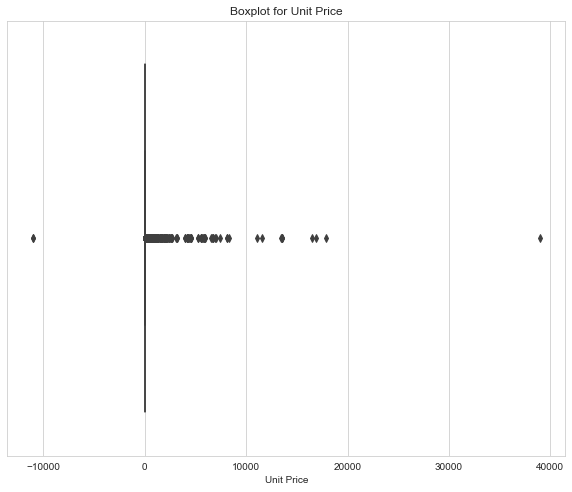

In [6]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()

## Distribution plot - Unit price

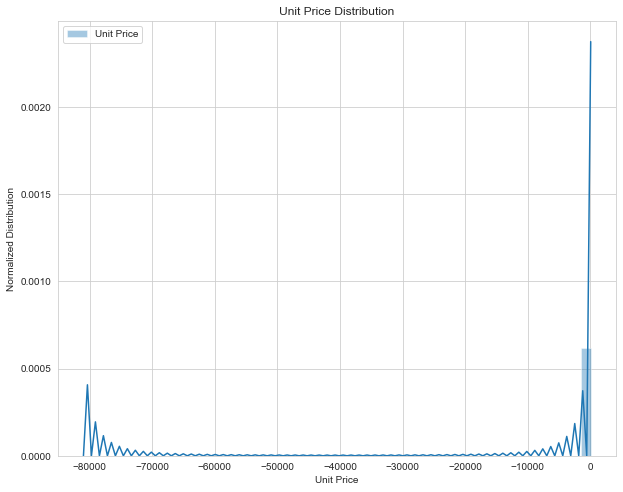

In [7]:
# Unit price distribition plot
plt.subplots(figsize=(10,8))
sns.distplot(df.Quantity[df.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

## Bar chart - Number of orders for each country

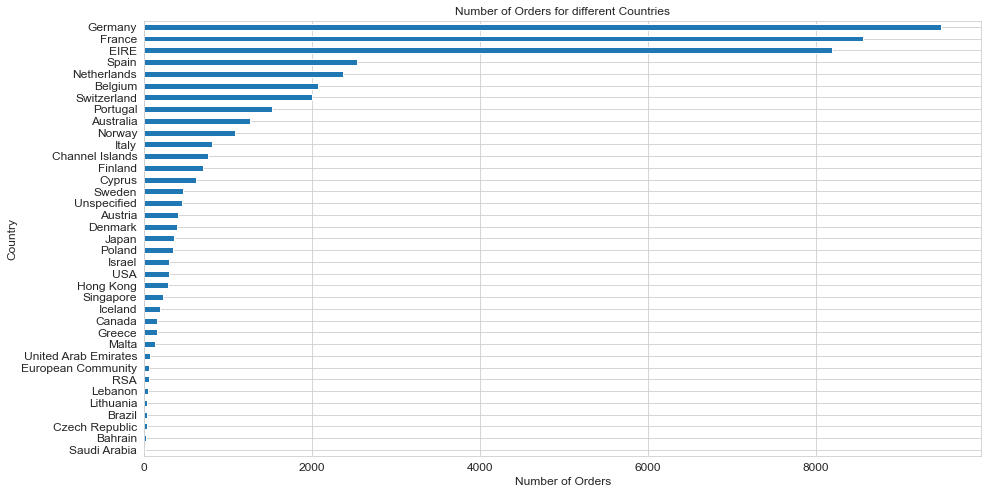

In [8]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom'] # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## Histogram

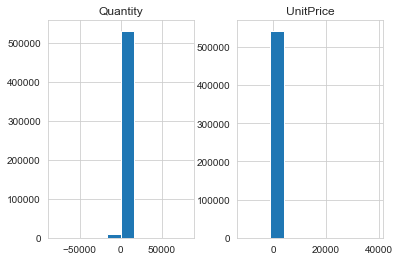

In [9]:
df_new = pd.DataFrame(df, columns = ['InvoiceNo', 'Quantity',  
                                    'UnitPrice'])
                            
  
# create histogram for numeric data 
df_new.hist() 
  
# show plot 
plt.show() 

## Skewness

In [10]:
# skewness along the index axis 
df.skew(axis = 0, skipna = True) 

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

In [11]:
#Use skew() function to find the skewness of the data over the column axis

# skip the na values 
# find skewness in each row 
df.skew(axis = 1, skipna = True) 

0         1.732051
1         1.732051
2         1.732050
3         1.732051
4         1.732051
            ...   
541904    1.732046
541905    1.732050
541906    1.732051
541907    1.732051
541908    1.732051
Length: 541909, dtype: float64

In [12]:
from scipy.stats import skew   
import pylab as p 


Skewness for data :  1.1108237139164436


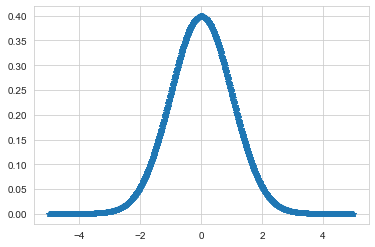

In [13]:
# Graph using numpy.linspace()  
# finding Skewness

x1 = np.linspace( -5, 5, 1000 ) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
  
p.plot(x1, y1, '*') 
  
print( '\nSkewness for data : ', skew(y1)) 


Skewness for data :  1.917677776148478


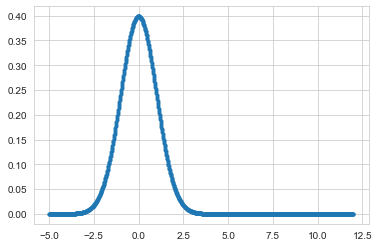

In [14]:
# Graph using numpy.linspace()  
# finding Skewness 
  
  
x1 = np.linspace( -5, 12, 1000 ) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
  
p.plot(x1, y1, '.') 
  
print( '\nSkewness for data : ', skew(y1)) 


In [15]:
# finding Skewness 
# random values based on a normal distribution 
x = np.random.normal(0, 2, 10000) 
  
print ("X : \n", x) 
  
print('\nSkewness for data : ', skew(x)) 

X : 
 [-0.20132356 -3.3201769   2.57098859 ...  1.74486854 -2.13613362
 -3.09054781]

Skewness for data :  -0.0024481126770708106


## Line Chart

numpy.ndarray

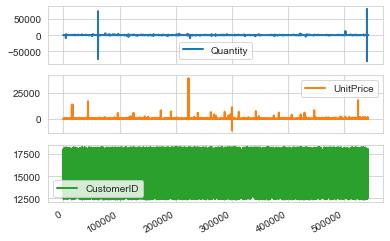

In [16]:
axes = df.plot.line(subplots=True,linewidth=2)
type(axes)

In [17]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


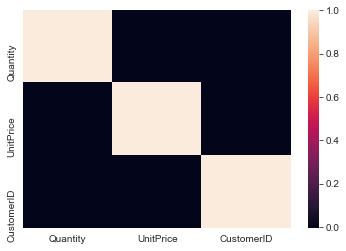

In [18]:
sns.heatmap(df.corr());

## Pairplot

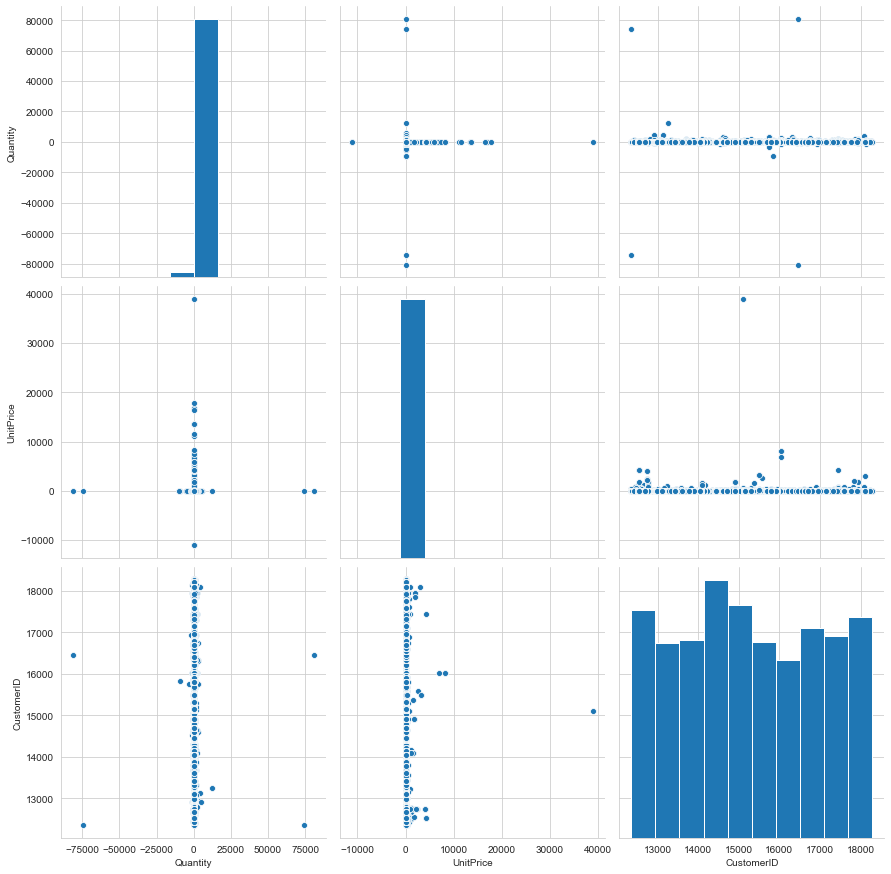

In [26]:
sns.pairplot(df, size=4);

## Unique Values

In [35]:
n = df.nunique(axis=0) 

In [36]:
n

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [50]:
duplicate = df[df.duplicated()] 
   

In [48]:
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom
